## Dataset
The dataset includes 13 columns, encompassing sleep duration, quality, sleep disorders, exercise, stress, diet, and other demographic data useful for analysis.

| Column | Description |
|---------|----------------------------------------|  
| `Person ID` | An identifier for each individual. |
| `Gender` | The gender of the person (Male/Female). |  
| `Age` | The age of the person in years. |
| `Occupation` | The occupation or profession of the person. |
| `Sleep Duration (hours)` | The average number of hours the person sleeps per day. |
| `Quality of Sleep (scale: 1-10)` | A subjective rating of the quality of sleep, ranging from 1 to 10. |
| `Physical Activity Level (minutes/day)` | The average number of minutes the person engages in physical activity daily. |  
| `Stress Level (scale: 1-10)` | A subjective rating of the stress level experienced by the person, ranging from 1 to 10. |
| `BMI Category` | The BMI category of the person (e.g., Underweight, Normal, Overweight). |
| `Blood Pressure (systolic/diastolic)` | The average blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure. |
| `Heart Rate (bpm)` | The average resting heart rate of the person in beats per minute. |
| `Daily Steps` | The average number of steps the person takes per day. |
| `Sleep Disorder` | The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea). |

#### Consideraciones

This project is part of my personal portfolio and has been conducted for educational purposes. The data about this project are the property [DataCamp](https://www.datacamp.com/portfolio/cesarnavarro94) and have been taken from one of their data science courses.

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [205]:
# File import
file = "sleep_health_data.csv"
sleep_dt = pd.read_csv(file)

# Datacheck
print(sleep_dt.describe())


        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  45.000000 

Person ID                  False
Gender                     False
Age                        False
Occupation                 False
Sleep Duration             False
Quality of Sleep           False
Physical Activity Level    False
Stress Level               False
BMI Category               False
Blood Pressure             False
Heart Rate                 False
Daily Steps                False
Sleep Disorder              True
dtype: bool
219
Axes(0.125,0.11;0.775x0.77)


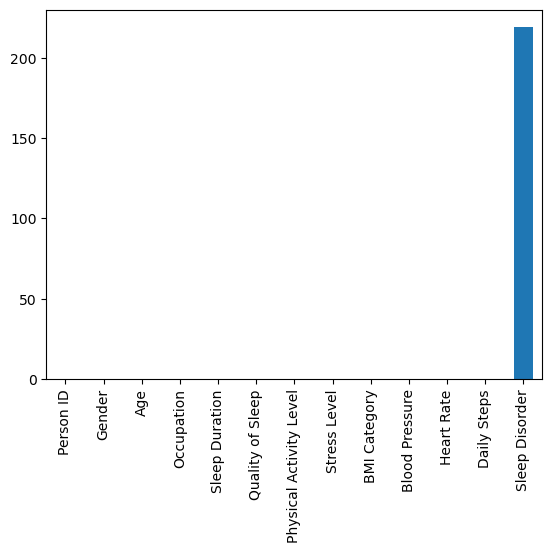

In [206]:
# Missing values detection
print(sleep_dt.isna().any())
print(sleep_dt["Sleep Disorder"].isna().sum())
missin_values = sleep_dt.isna().sum().plot(kind="bar")
print(missin_values)
plt.savefig("./figs/missin_values.png")


In [207]:
sleep_dt = sleep_dt.fillna("None")

In [208]:
sleep_dt.isna().any()

Person ID                  False
Gender                     False
Age                        False
Occupation                 False
Sleep Duration             False
Quality of Sleep           False
Physical Activity Level    False
Stress Level               False
BMI Category               False
Blood Pressure             False
Heart Rate                 False
Daily Steps                False
Sleep Disorder             False
dtype: bool

Gender
Male      189
Female    185
Name: count, dtype: int64

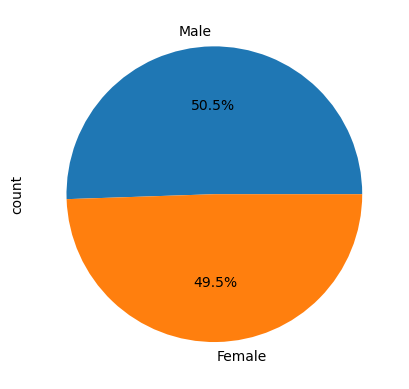

In [209]:
# Distribución de genero en la muestra
gender_counts = sleep_dt["Gender"].value_counts()
gender_counts.plot(kind="pie", autopct='%1.1f%%')
print(gender_counts)

plt.savefig("./figs/gender_distribution.png")


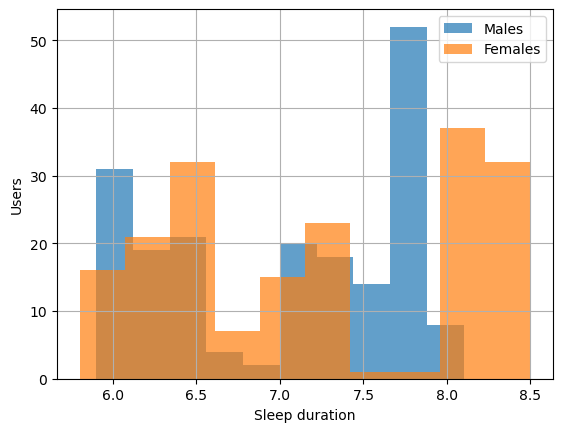

In [210]:
# Sleep duration by gender
male_sleep_dur = sleep_dt[sleep_dt["Gender"] == "Male"]["Sleep Duration"].hist(alpha=0.7)
female_sleep_dur = sleep_dt[sleep_dt["Gender"] == "Female"]["Sleep Duration"].hist(alpha=0.7)
plt.legend(["Males", "Females"])
plt.xlabel("Sleep duration")
plt.ylabel("Users")

plt.savefig("./figs/sleep_duration_gender.png")

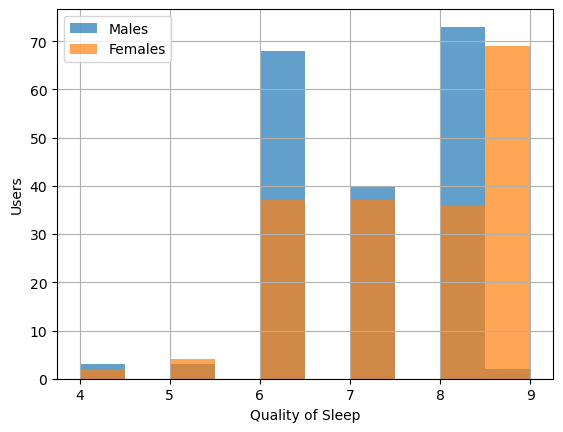

In [211]:
# Sleep quality by gender
male_sleep_qua = sleep_dt[sleep_dt["Gender"] == "Male"]["Quality of Sleep"].hist(alpha=0.7)
female_sleep_qua = sleep_dt[sleep_dt["Gender"] == "Female"]["Quality of Sleep"].hist(alpha=0.7)
plt.legend(["Males", "Females"])
plt.xlabel("Quality of Sleep")
plt.ylabel("Users")

plt.savefig("./figs/sleep_quality_gender.png")

Axes(0.125,0.11;0.775x0.77)


Text(46.972222222222214, 0.5, 'Frequency')

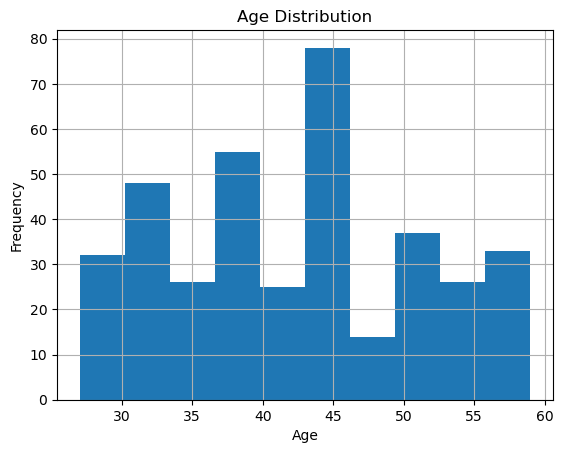

In [212]:
# Age distibution
age_distribution = sleep_dt["Age"].hist()
print(age_distribution)
plt.savefig("./figs/age_distribution")

plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

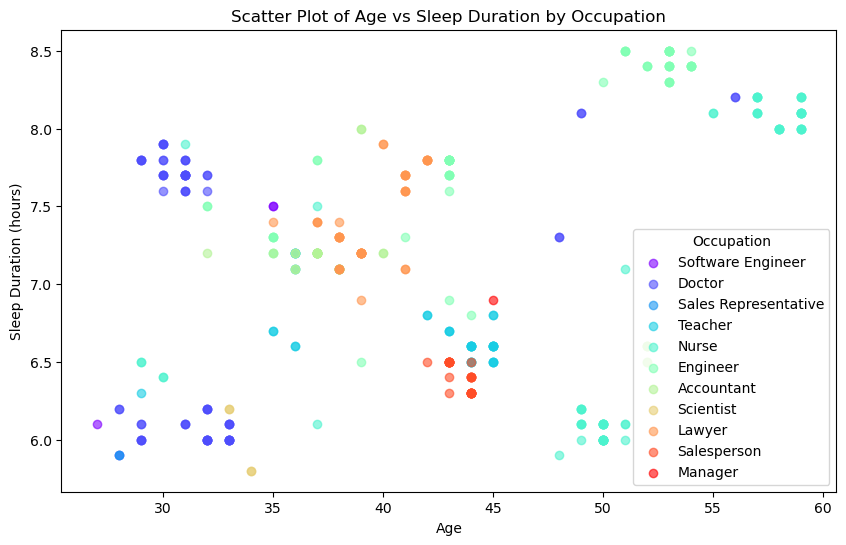

In [218]:
#
occupations = sleep_dt['Occupation'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(occupations)))
color_dict = {occupation: color for occupation, color in zip(occupations, colors)}

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
for occupation in occupations:
    subset = sleep_dt[sleep_dt['Occupation'] == occupation]
    plt.scatter(subset['Age'], subset['Sleep Duration'], label=occupation, color=color_dict[occupation], alpha=0.6)

# Configurar etiquetas y título
plt.xlabel("Age")
plt.ylabel("Sleep Duration (hours)")
plt.title("Scatter Plot of Age vs Sleep Duration by Occupation")
plt.legend(title="Occupation")

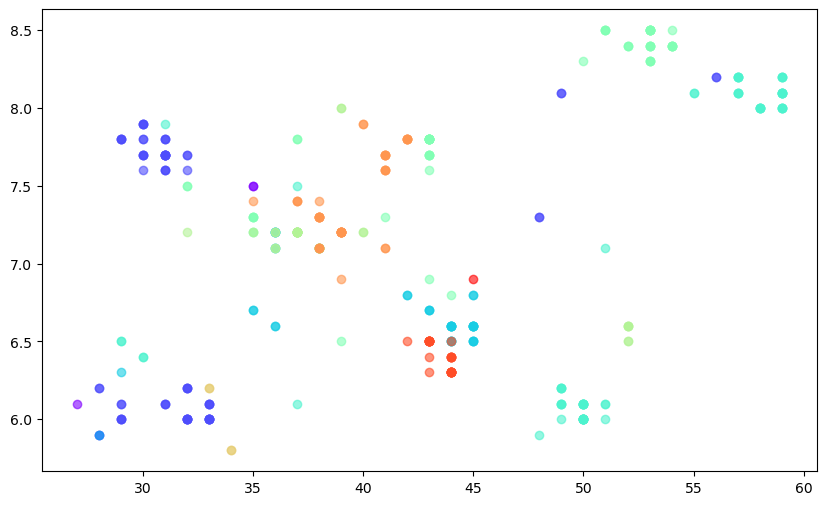

In [219]:
# Relation between agen a sleep duration

age_sleep_dur = sleep_dt.plot(kind="scatter",
                              x="Age",
                              y="Sleep Duration",
                              color=color_dict[occupation]
                              )

plt.show()

El promedio de duracion del sueño para la muestra es 7.13
El promedio de calidad del sueño para la muestra es 7.31


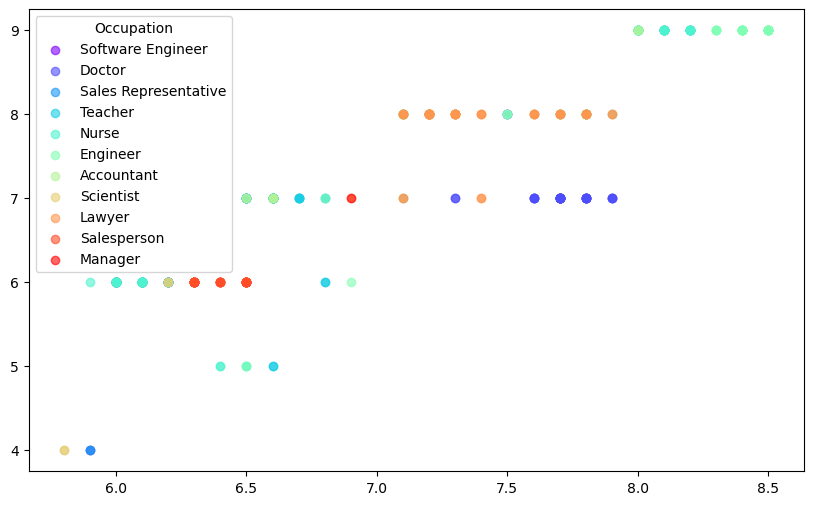

<Figure size 640x480 with 0 Axes>

In [224]:

# Calculate the mean sleep duration
duration_mean = round(sleep_dt["Sleep Duration"].mean(), 2)
print("El promedio de duracion del sueño para la muestra es", duration_mean)

# Calculate the mean sleep quality
quality_mean = round(sleep_dt["Quality of Sleep"].mean(), 2)
print("El promedio de calidad del sueño para la muestra es", quality_mean)

# Get the sleep duration and quality data
sleep_duration = sleep_dt["Sleep Duration"]
sleep_quality = sleep_dt["Quality of Sleep"]

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
for occupation in occupations:
    subset = sleep_dt[sleep_dt['Occupation'] == occupation]
    plt.scatter(subset['Sleep Duration'], subset['Quality of Sleep'], label=occupation, color=color_dict[occupation], alpha=0.6)
plt.legend(title="Occupation")
plt.show()

# Save the plot as an image
plt.savefig("sleep_dur_qua_relation.png")


Axes(0.125,0.11;0.775x0.77)
Sales Representative


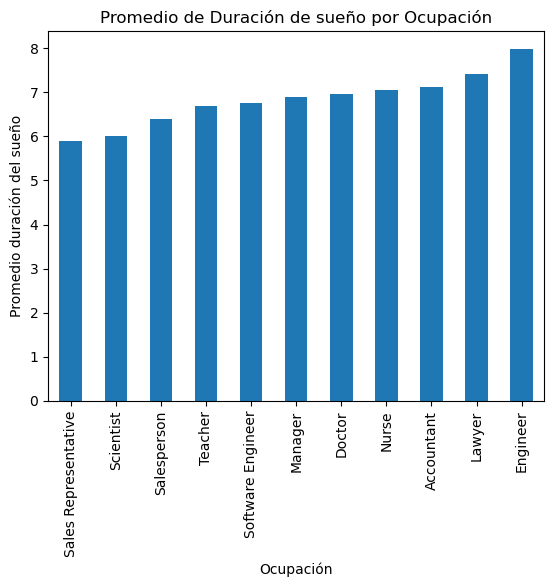

In [ ]:
# Promedio de duracion del sueño por ocupación
sleep_dur_mean_occ = sleep_dt.groupby("Occupation")["Sleep Duration"].mean().sort_values()

print(sleep_dur_mean_occ.plot(kind="bar", 
                              title="Promedio de Duración de sueño por Ocupación",
                              xlabel="Ocupación",
                              ylabel="Promedio duración del sueño",))

lowest_sleep_occ = str(sleep_dur_mean_occ.index[0])
print(lowest_sleep_occ)


Axes(0.125,0.11;0.775x0.77)
Sales Representative


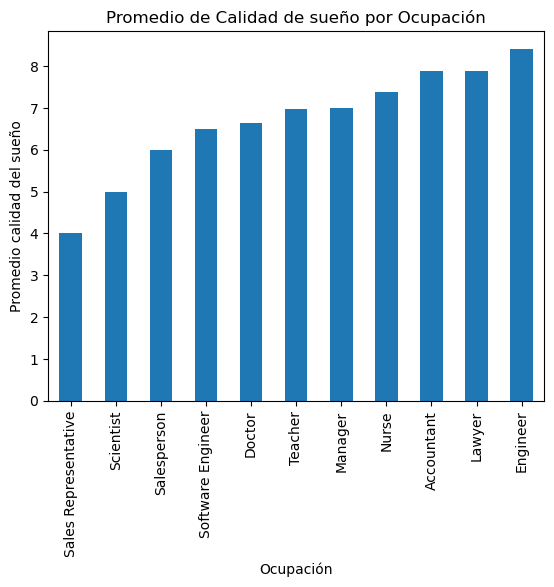

In [ ]:
# Promedio de calidad del sueño por ocupación
sleep_qua_occ = sleep_dt.groupby("Occupation")["Quality of Sleep"].mean().sort_values()

print(sleep_qua_occ.plot(kind="bar", 
                              title="Promedio de Calidad de sueño por Ocupación",
                              xlabel="Ocupación",
                              ylabel="Promedio calidad del sueño",))
                              
lowest_sleep_quality_occ = str(sleep_qua_occ.index[0])
print(lowest_sleep_quality_occ)


In [ ]:
# Define si una misma ocupación tiene los regisros de sueño y calidad más bajos
if lowest_sleep_occ == lowest_sleep_quality_occ:
    same_occ = True
else:
    same_occ = False

Axes(0.22375,0.11;0.5775x0.77)


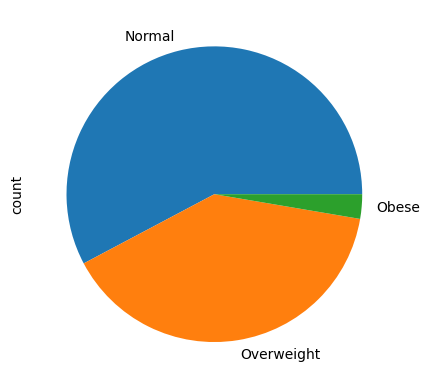

In [ ]:
# Categorias de BMI
bmi_cat = sleep_dt["BMI Category"].value_counts(sort=True)

# Distribucion de usuario por BMI
print(bmi_cat.plot(kind="pie"))


Axes(0.125,0.11;0.775x0.77)


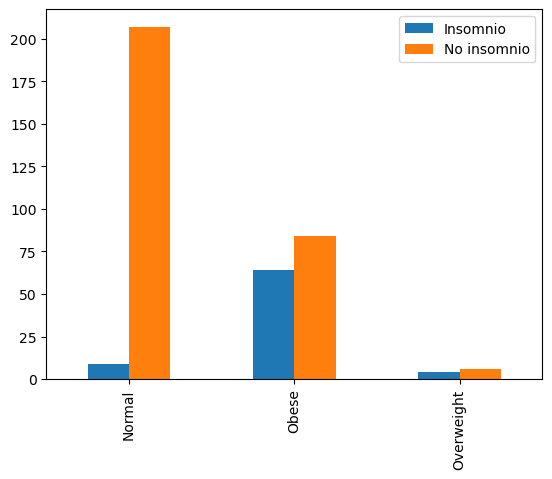

In [ ]:
# Filtra los usuarios por cada categoria de BMI
bmi_normal = sleep_dt[sleep_dt["BMI Category"] == "Normal"]
bmi_obese = sleep_dt[sleep_dt["BMI Category"] == "Obese"]
bmi_overweight = sleep_dt[sleep_dt["BMI Category"] == "Overweight"]

# Filtra los usuarios que padecen insomnio por cada categoria del BMI
inso_bmi_normal = len(sleep_dt[(sleep_dt["BMI Category"] == "Normal") & (sleep_dt["Sleep Disorder"] == "Insomnia")])
inso_bmi_obese = len(sleep_dt[(sleep_dt["BMI Category"] == "Obese") & (sleep_dt["Sleep Disorder"] == "Insomnia")])
inso_bmi_overweight = len(sleep_dt[(sleep_dt["BMI Category"] == "Overweight") & (sleep_dt["Sleep Disorder"] == "Insomnia")])

# Crea un dataframe con los usuarios que padecen insomnio frente a los que no, por cada categoria BMI
inso_noinso_bmi = pd.DataFrame({"Insomnio" : [inso_bmi_normal,inso_bmi_overweight, inso_bmi_obese],
                                "No insomnio" : [len(bmi_normal)- inso_bmi_normal, len(bmi_overweight)-inso_bmi_overweight, len(bmi_obese)-inso_bmi_obese]},
                                index=["Normal","Obese","Overweight"])

print(inso_noinso_bmi.plot(kind="bar",stacked=False))


Axes(0.125,0.11;0.775x0.77)


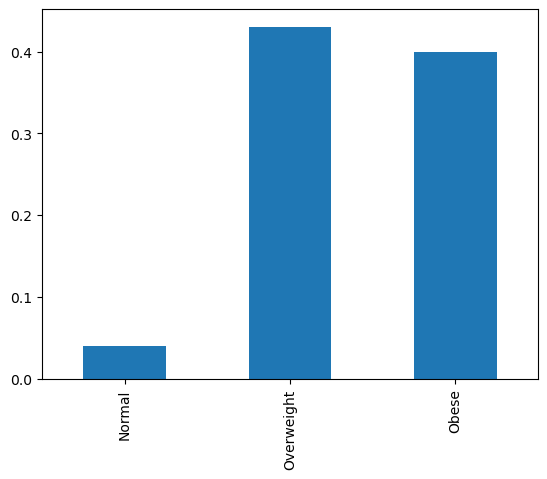

In [ ]:
# Calcular el ratio, n/N de personas con insomnia por cada categoria del BMI
ratio_bmi_normal = float(round(inso_bmi_normal/len(bmi_normal),2))
ratio_bmi_obse = float(round(inso_bmi_obese/len(bmi_obese),2))
ratio_bmi_overweight = float(round(inso_bmi_overweight/len(bmi_overweight),2))

# Guardarlos en un diccionario
bmi_insomnia_ratios = {"Normal":ratio_bmi_normal,
                       "Overweight":ratio_bmi_overweight,
                       "Obese":ratio_bmi_obse,
}

# Ratios de presencia de insomnio por categoria BMI
print(pd.Series(bmi_insomnia_ratios).plot(kind="bar"))

In [ ]:
# Relacion entre indice BMI y padecimiento de insomnia


In [ ]:
# Gender 
